# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | husavik
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | dafeng
Processing Record 5 of Set 1 | shitanjing
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | angoche
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | sept-iles
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | sakakah
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | soe
Processing Record 17 of Set 1 | monte alegre
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | ballina
Processing Record 20 of Set 1 | luziania
Processing Record 21 of Set 1 | vanimo
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 23 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()



City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,husavik,66.0449,-17.3389,-3.93,66,63,5.48,IS,1675811394
1,barrow,71.2906,-156.7887,-16.99,71,100,3.60,US,1675811395
2,castro,-24.7911,-50.0119,18.11,92,11,2.51,BR,1675811395
3,dafeng,23.4517,108.5881,14.90,98,100,1.64,CN,1675811396
4,shitanjing,39.2342,106.3439,-3.13,46,100,2.98,CN,1675811396


In [9]:
# Export the City_Data into a csv
# city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
city_data_df.to_csv(r"C:\Users\Sam Song\Desktop\Data Analytics Bootcamp\Module 6 Challenge\python-api-challenge\Module 6 Starter Code\output_data\cities.csv", index_label="City_ID")


In [11]:
# Read saved data
# city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df = pd.read_csv(r"C:\Users\Sam Song\Desktop\Data Analytics Bootcamp\Module 6 Challenge\python-api-challenge\Module 6 Starter Code\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,husavik,66.0449,-17.3389,-3.93,66,63,5.48,IS,1675811394
1,barrow,71.2906,-156.7887,-16.99,71,100,3.60,US,1675811395
2,castro,-24.7911,-50.0119,18.11,92,11,2.51,BR,1675811395
3,dafeng,23.4517,108.5881,14.90,98,100,1.64,CN,1675811396
4,shitanjing,39.2342,106.3439,-3.13,46,100,2.98,CN,1675811396


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

C:\Users\Sam Song\AppData\Local\Temp\ipykernel_9804\3175673905.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")


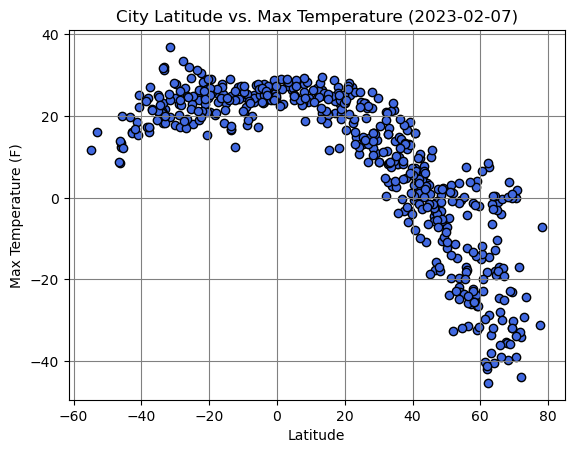

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="royalblue")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")


# Save the figure
plt.savefig(r"C:\Users\Sam Song\Desktop\Data Analytics Bootcamp\Module 6 Challenge\python-api-challenge\Module 6 Starter Code\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

C:\Users\Sam Song\AppData\Local\Temp\ipykernel_9804\2322416661.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")


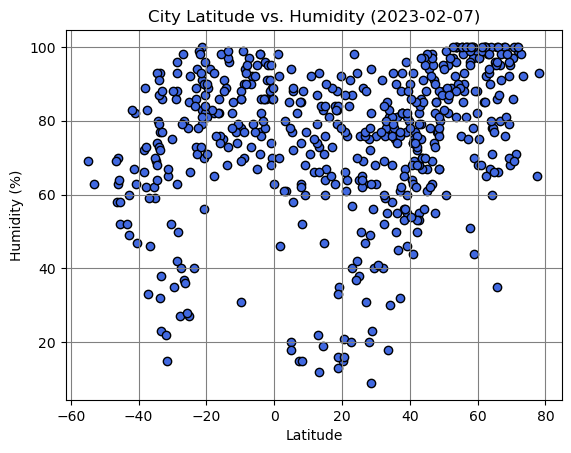

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="royalblue")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")


# Save the figure
plt.savefig(r"C:\Users\Sam Song\Desktop\Data Analytics Bootcamp\Module 6 Challenge\python-api-challenge\Module 6 Starter Code\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

C:\Users\Sam Song\AppData\Local\Temp\ipykernel_9804\3858709626.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")


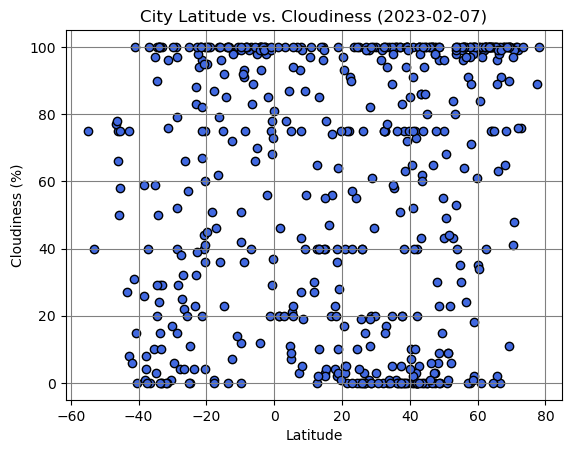

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="royalblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

# Save the figure
plt.savefig(r"C:\Users\Sam Song\Desktop\Data Analytics Bootcamp\Module 6 Challenge\python-api-challenge\Module 6 Starter Code\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

C:\Users\Sam Song\AppData\Local\Temp\ipykernel_9804\1261067709.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")


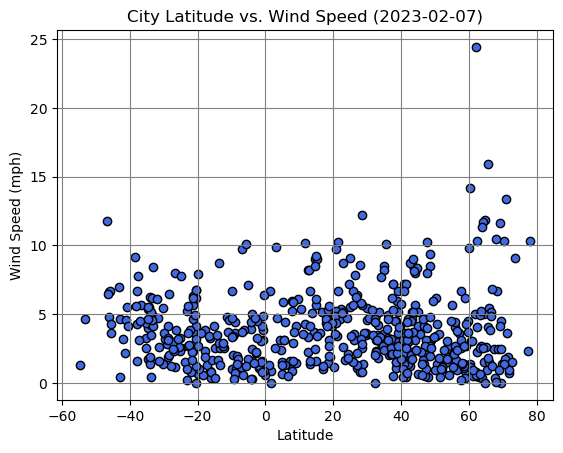

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="royalblue")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")


# Save the figure
plt.savefig(r"C:\Users\Sam Song\Desktop\Data Analytics Bootcamp\Module 6 Challenge\python-api-challenge\Module 6 Starter Code\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x, y, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x, y)
    regression_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2))
    
    plt.scatter(x, y)
    plt.plot(x, regression_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize= 15, color= "red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,husavik,66.0449,-17.3389,-3.93,66,63,5.48,IS,1675811394
1,barrow,71.2906,-156.7887,-16.99,71,100,3.60,US,1675811395
3,dafeng,23.4517,108.5881,14.90,98,100,1.64,CN,1675811396
4,shitanjing,39.2342,106.3439,-3.13,46,100,2.98,CN,1675811396
10,vardo,70.3705,31.1107,-0.01,86,41,10.29,NO,1675811398


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,castro,-24.7911,-50.0119,18.11,92,11,2.51,BR,1675811395
5,bredasdorp,-34.5322,20.0403,19.44,74,90,4.01,ZA,1675811396
6,angoche,-16.2325,39.9086,25.12,86,100,3.30,MZ,1675811397
7,hobart,-42.8794,147.3294,16.14,60,75,4.63,AU,1675811397
8,mataura,-46.1927,168.8643,8.60,70,75,4.82,NZ,1675811397


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8599660591909246


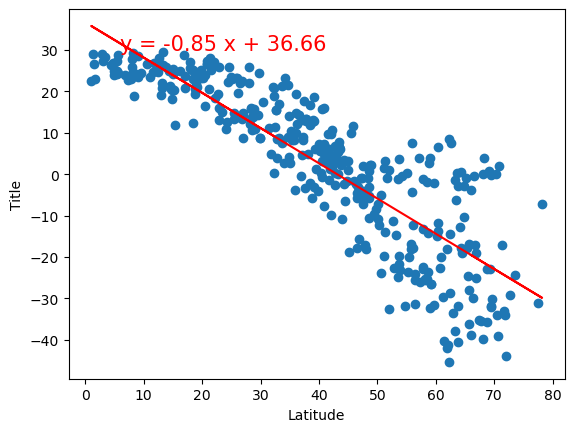

In [48]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df ["Lat"]
y = northern_hemi_df ["Max Temp"]
lin_reg_plot(x, y, "Max Temp", (6,30))

The r-squared is: 0.4390573100351012


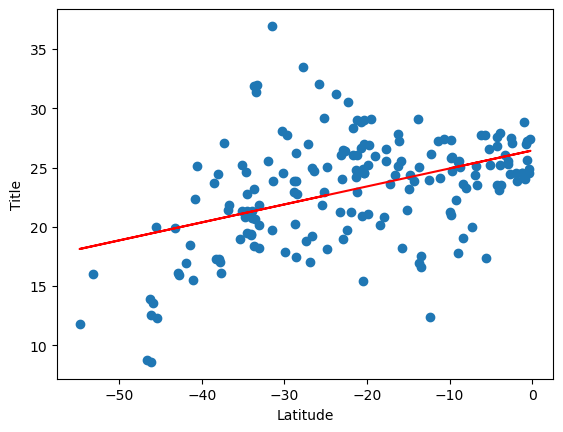

In [50]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df ["Lat"]
y = southern_hemi_df ["Max Temp"]
lin_reg_plot(x,y, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.4327706238817334


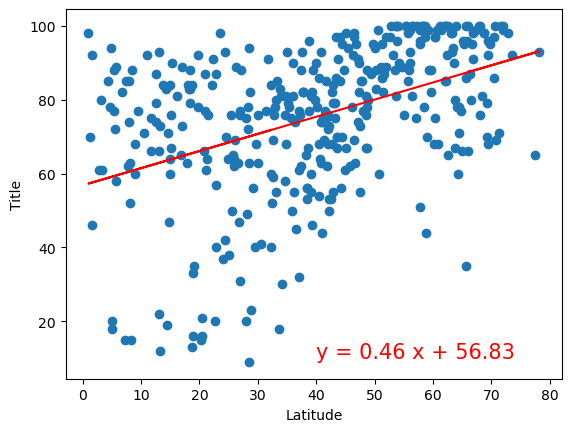

In [51]:
# Northern Hemisphere
x = northern_hemi_df ["Lat"]
y = northern_hemi_df ["Humidity"]
lin_reg_plot(x,y, 'Humidity', (40,10))

The r-squared is: 0.4266648919556176


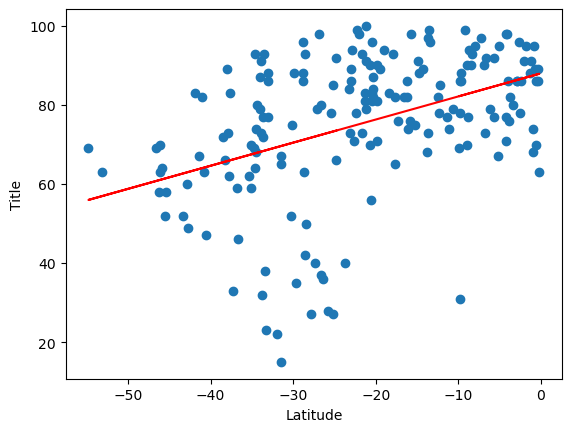

In [52]:
# Southern Hemisphere
x = southern_hemi_df ["Lat"]
y = southern_hemi_df ["Humidity"]
lin_reg_plot(x,y, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.29382990274843124


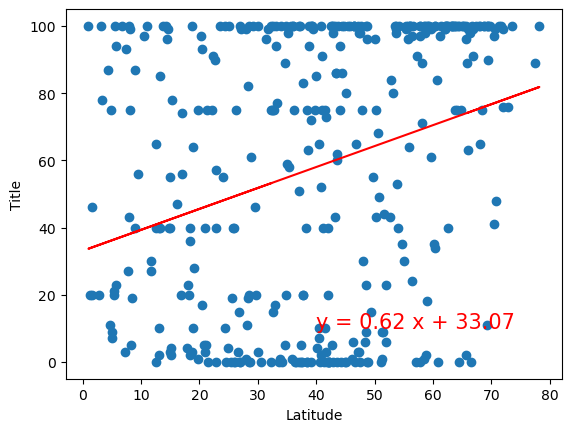

In [53]:
# Northern Hemisphere
x = northern_hemi_df ["Lat"]
y = northern_hemi_df ["Cloudiness"]
lin_reg_plot(x,y, 'Cloudiness', (40,10))

The r-squared is: 0.3548452581248524


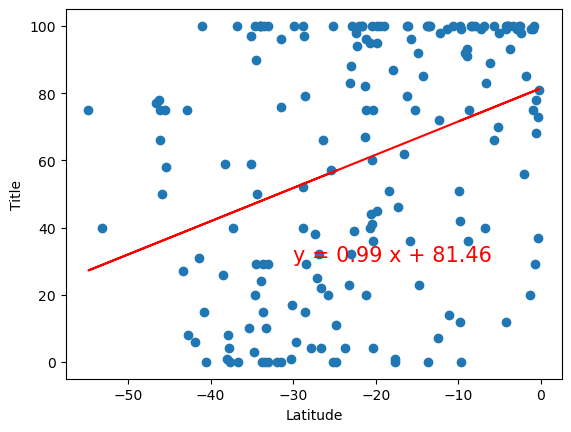

In [55]:
# Southern Hemisphere
x = southern_hemi_df ["Lat"]
y = southern_hemi_df ["Cloudiness"]
lin_reg_plot(x,y, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.03160019929259828


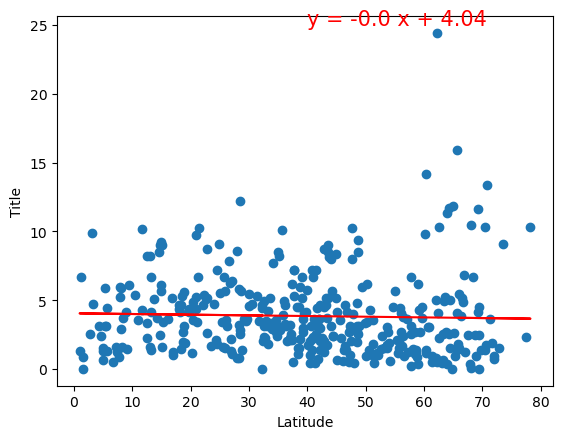

In [57]:
# Northern Hemisphere
x = northern_hemi_df ["Lat"]
y = northern_hemi_df ["Wind Speed"]
lin_reg_plot(x,y, 'Wind Speed', (40,25))

The r-squared is: -0.2772815857498452


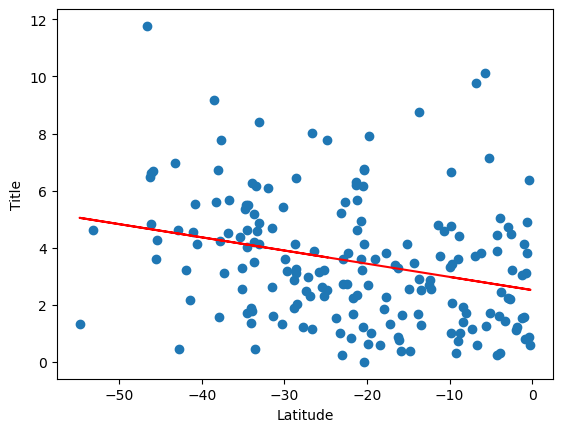

In [58]:
# Southern Hemisphere
x = southern_hemi_df ["Lat"]
y = southern_hemi_df ["Wind Speed"]
lin_reg_plot(x,y, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE